![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()


,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [25]:
dataTraining.describe()

,Price,Year,Mileage,State,Make,Model
count,400000.000000,400000.000000,4.000000e+05,400000.000000,400000.000000,400000.000000
mean,21146.919312,2013.198125,5.507296e+04,24.034658,15.833530,254.827082
std,10753.664940,3.292326,4.088102e+04,15.325588,10.299097,148.634414
min,5001.000000,1997.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,13499.000000,2012.000000,2.584100e+04,9.000000,8.000000,124.000000
50%,18450.000000,2014.000000,4.295500e+04,24.000000,13.000000,248.000000
75%,26999.000000,2016.000000,7.743300e+04,39.000000,20.000000,404.000000
max,79999.000000,2018.000000,2.457832e+06,50.000000,37.000000,524.000000


In [28]:
# counting the duplicates
dups = dataTraining.pivot_table(index = ['Year','Mileage','State','Make','Model'], aggfunc ='size')
# displaying the duplicate Series
print(dups)



Year  Mileage  State  Make  Model
1997  400      33     29    56       1
      3821     47     32    261      1
      7145     48     6     81       1
      23746    47     29    31       1
      29430    24     6     125      1
                                    ..
2018  11553    1      6     158      1
      11592    25     6     158      1
      11634    23     6     157      1
      14526    35     6     158      1
      14645    25     6     157      1
Length: 399523, dtype: int64


In [29]:
# Filtrar duplicados que aparecen más de dos veces
dups_mask = dups > 2
dups_filtered = dups[dups_mask]

# Mostrar los duplicados filtrados
print(dups_filtered)


Year  Mileage  State  Make  Model
2016  5        4      6     417       6
               27     18    324       5
      10       44     10    438       5
      11       4      18    223       4
               9      24    434       3
      12       14     10    455       4
               47     24    59        3
      15       4      6     417       5
      36       3      37    393       3
      150      31     10    174       3
      5000     40     7     6         4
2017  5        4      6     417       4
      6        45     35    443       3
      7        14     35    409       4
      8        9      35    89        9
      9        43     17    489       4
      10       4      18    324       3
               38     0     373       4
               44     10    182       3
                            203       5
                            204       3
                            217       6
                            438      13
                            468       9
      

In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 75000 + 5000, index=dataTesting.index, columns=['Price'])

In [7]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


## Preprocesamiento de datos

In [8]:
dataTraining['Make'].sort_values().unique()

array(['Acura', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac',
       'Chevrolet', 'Chrysler', 'Dodge', 'FIAT', 'Ford', 'Freightliner',
       'GMC', 'Honda', 'Hyundai', 'INFINITI', 'Jaguar', 'Jeep', 'Kia',
       'Land', 'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz',
       'Mercury', 'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'Ram',
       'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [9]:
dataTraining['Model'].sort_values().unique()

array(['1', '15002WD', '15004WD', '1500Laramie', '1500Tradesman', '200LX',
       '200Limited', '200S', '200Touring', '25002WD', '25004WD', '3',
       '300300C', '300300S', '3004dr', '300Base', '300Limited',
       '300Touring', '35004WD', '350Z2dr', '4Runner2WD', '4Runner4WD',
       '4Runner4dr', '4RunnerLimited', '4RunnerRWD', '4RunnerSR5',
       '4RunnerTrail', '5', '500Pop', '6', '7', '911', '9112dr', 'A34dr',
       'A44dr', 'A64dr', 'A8', 'AcadiaAWD', 'AcadiaFWD', 'Accent4dr',
       'Accord', 'AccordEX', 'AccordEX-L', 'AccordLX', 'AccordLX-S',
       'AccordSE', 'Altima4dr', 'Armada2WD', 'Armada4WD', 'Avalanche2WD',
       'Avalanche4WD', 'Avalon4dr', 'AvalonLimited', 'AvalonTouring',
       'AvalonXLE', 'Azera4dr', 'Boxster2dr', 'C-Class4dr', 'C-ClassC',
       'C-ClassC300', 'C-ClassC350', 'C702dr', 'CC4dr', 'CR-V2WD',
       'CR-V4WD', 'CR-VEX', 'CR-VEX-L', 'CR-VLX', 'CR-VSE', 'CR-ZEX',
       'CT', 'CTCT', 'CTS', 'CTS-V', 'CTS4dr', 'CX-7FWD', 'CX-9AWD',
       'CX-9FWD', 

In [10]:
dataTraining['State'].unique()

array([' FL', ' OH', ' TX', ' CO', ' ME', ' WA', ' CT', ' CA', ' LA',
       ' NY', ' PA', ' SC', ' ND', ' NC', ' GA', ' AZ', ' TN', ' KY',
       ' NJ', ' UT', ' IA', ' AL', ' NE', ' IL', ' OK', ' MD', ' NV',
       ' WV', ' MI', ' VA', ' WI', ' MA', ' OR', ' IN', ' NM', ' MO',
       ' HI', ' KS', ' AR', ' MN', ' MS', ' MT', ' AK', ' VT', ' SD',
       ' NH', ' DE', ' ID', ' RI', ' WY', ' DC'], dtype=object)

In [11]:
print(dataTraining.describe)

<bound method NDFrame.describe of         Price  Year  Mileage State        Make           Model
0       34995  2017     9913    FL        Jeep        Wrangler
1       37895  2015    20578    OH   Chevrolet        Tahoe4WD
2       18430  2012    83716    TX         BMW           X5AWD
3       24681  2014    28729    OH    Cadillac       SRXLuxury
4       26998  2013    64032    CO        Jeep        Wrangler
...       ...   ...      ...   ...         ...             ...
399995  29900  2015    25287    TX       Lexus            RXRX
399996  17688  2015    17677    MI   Chevrolet      EquinoxFWD
399997  24907  2014    66688    NC       Buick  EnclaveLeather
399998  11498  2014    37872    IN  Volkswagen           Jetta
399999  16900  2014    78606    CO      Nissan     PathfinderS

[400000 rows x 6 columns]>


In [12]:
dataTraining.isnull().values.any()

False

In [13]:
dataTraining['Model'].value_counts()

Silverado          18085
Grand              12344
Sierra              8409
Accord              7357
F-1504WD            6684
                   ...  
PathfinderSE          53
Galant4dr             53
SLK-ClassSLK350       52
Monte                 48
RX-84dr               48
Name: Model, Length: 525, dtype: int64

In [14]:
# Create arrary of categorial variables to be encoded
categorical_cols = ['State', 'Make', 'Model']
le = LabelEncoder()
# apply label encoder on categorical feature columns
dataTraining[categorical_cols] = dataTraining[categorical_cols].apply(lambda col: le.fit_transform(col))

In [15]:
Y = (dataTraining.Price)
X = dataTraining.drop(['Price'], axis=1)

In [16]:
X

,Year,Mileage,State,Make,Model
0,2017,9913,9,17,489
1,2015,20578,35,6,448
2,2012,83716,43,2,499
3,2014,28729,35,5,398
4,2013,64032,5,17,489
...,...,...,...,...,...
399995,2015,25287,43,20,377
399996,2015,17677,22,6,158
399997,2014,66688,27,4,154
399998,2014,37872,15,36,264


In [17]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.95, random_state=42)

## Calibracion del modelo XGBoost

In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [19]:
#Find optimal number of trees
learning_range = [0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.3]
for val in learning_range:
    score = cross_val_score(XGBRegressor(learning_rate= val, random_state= 42), X, Y, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')


Average score(0.01): -10655.973
Average score(0.05): -4836.331
Average score(0.1): -4147.370
Average score(0.15): -3892.259
Average score(0.2): -3767.973
Average score(0.25): -3701.965
Average score(0.3): -3671.763


In [20]:
#Find optimal gamma
gamma_range = [0, 0.25, 0.5, 0.75, 1]
for val in gamma_range:
    score = cross_val_score(XGBRegressor(gamma= val, random_state= 42), X, Y,scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(0): -3671.763
Average score(0.25): -3671.763
Average score(0.5): -3671.763
Average score(0.75): -3671.763
Average score(1): -3671.763


In [21]:
#Find optimal gamma
col_range = [0, 0.25, 0.5, 0.75, 1,1.25,1.5]
for val in col_range:
    score = cross_val_score(XGBRegressor(colsample_bytree= val, random_state= 42), X_train, y_train,scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(0): -4875.794
Average score(0.25): -4875.794
Average score(0.5): -4103.258
Average score(0.75): -4087.460
Average score(1): -4135.460
Average score(1.25): nan
Average score(1.5): nan


In [22]:
learning_range = [0.1,0.2,0.3,0.40, 0.50, 0.60, 0.70,0.8,0.9,1]
for val in learning_range:
    score = cross_val_score(XGBRegressor(learning_rate= val, random_state= 42), X_train, y_train, scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(0.1): -4481.069
Average score(0.2): -4192.721
Average score(0.3): -4135.460
Average score(0.4): -4161.040
Average score(0.5): -4237.917
Average score(0.6): -4329.767
Average score(0.7): -4372.798
Average score(0.8): -4518.608
Average score(0.9): -4631.777
Average score(1): -4792.953


In [23]:
gamma_range = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
for val in gamma_range:
    score = cross_val_score(XGBRegressor(learning_rate= 0.3, colsample_bytree= 0.75,gamma= val, random_state= 42), X_test, y_test,scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(0): -3673.511
Average score(0.1): -3673.511
Average score(0.2): -3673.511
Average score(0.3): -3673.511
Average score(0.4): -3673.511
Average score(0.5): -3673.511
Average score(0.6): -3673.511
Average score(0.7): -3673.511
Average score(0.8): -3673.511
Average score(0.9): -3673.511
Average score(1): -3673.511


In [30]:
n_estimator = [100,200,300,400,500,600,700,800,900]
for val in n_estimator:
    score = cross_val_score(XGBRegressor(learning_rate= 0.3, colsample_bytree= 0.75,n_estimators= val, random_state= 42), X_test, y_test,scoring="neg_root_mean_squared_error")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(100): -3673.511
Average score(200): -3558.280
Average score(300): -3524.348
Average score(400): -3510.915
Average score(500): -3502.619
Average score(600): -3498.791
Average score(700): -3497.723
Average score(800): -3497.224
Average score(900): -3499.921


In [31]:
cross_val_score(XGBRegressor(learning_rate= 0.3, colsample_bytree= 0.75,n_estimators= 2000,random_state= 42,), X_train, y_train, scoring="neg_root_mean_squared_error").mean()

-4302.7704646496395

## Entrenamiento del modelo

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [33]:
# Parametros
params = {"booster":"gbtree", "max_depth": 4, "eta": .3, "objective": "binary:logistic", "nthread":10}

In [34]:
xgb = XGBRegressor( learning_rate= 0.3, colsample_bytree= 0.75,n_estimators= 600, random_state= 42).fit(X_train,y_train)
# Evaluar modelo con los datos de prueba

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score , f1_score,r2_score


y_pred_xgb = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
maeXGB= mean_absolute_error(y_test, y_pred_xgb)
r2scorexgb = r2_score(y_test, y_pred_xgb)
#accuracyXGB = accuracy_score(y_test, y_pred_xgb)
#f1ScoreXGB = f1_score(y_test, y_pred_xgb)

# Imprimir resultado
print(f'El MSE para el modelo Random Forest es: {mse}')
print(f'El MAE para el modelo Random Forest es: {maeXGB}')
print(f'El R2-Score para el modelo XGBoost es: {r2scorexgb}')
#print(f'El Accuracy para el modelo XGBoost es: {accuracyXGB}')
#print(f'El F1-Score para el modelo XGBoost es: {f1ScoreXGB}')


El MSE para el modelo Random Forest es: 12213825.381440388
El MAE para el modelo Random Forest es: 2230.8351570795235
El R2-Score para el modelo XGBoost es: 0.8938383175674931


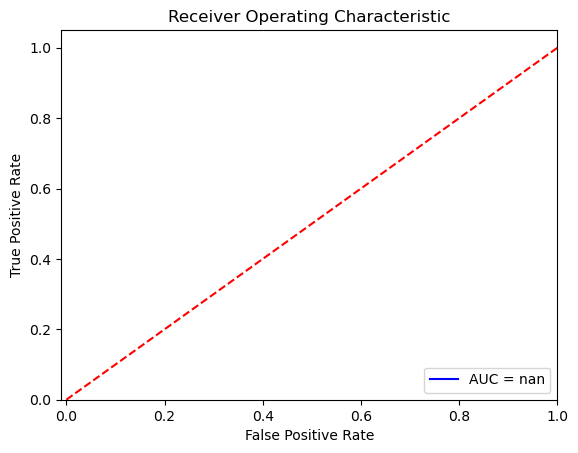

In [36]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_xgb ,pos_label=1)
AUC= metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred_xgb

array([13911.666, 24015.18 , 14666.965, ..., 21109.246, 16090.388,
       15827.315], dtype=float32)

In [38]:
dataTesting[categorical_cols] = dataTesting[categorical_cols].apply(lambda col: le.fit_transform(col))

In [39]:
y_pred_uno = xgb.predict(dataTesting)

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTest_carListings.zip', index_col=0)

# Selección de características relevantes
features = ['Year','Mileage','State','Make','Model']

# Preprocesamiento de los datos
X = pd.get_dummies(dataTraining[features])
y = dataTraining['Price']
X = X.fillna(X.mean())

# Separación del conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo en el conjunto de validación
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
r2 = model.score(X_val, y_val)
print('MSE:', mse)
print('R^2:', r2)

# Predicción del conjunto de prueba

X_test = pd.get_dummies(dataTesting[features])
X_test = X_test.fillna(X_test.mean())
y_test = model.predict(X_test)

# Guardar predicciones en formato exigido en la competencia de kaggle
submission = pd.DataFrame({'ID': dataTesting.index, 'Price': y_test})
submission.to_csv('test_submission.csv', index=False)

MSE: 19156359.139840566
R^2: 0.8334943187695243


ValueError: X has 615 features, but LinearRegression is expecting 616 features as input.

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de los datos
X = data.drop('Price', axis=1)
# Selección de características relevantes
features = ['Year','Mileage','State','Make','Model']

# Preprocesamiento de los datos
X = pd.get_dummies(dataTraining[features])
y = dataTraining['Price']
X = X.fillna(X.mean())

# Separación de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de la cuadrícula de hiperparámetros a buscar
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 0.75, 1.0]
}

# Definición del modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Búsqueda de los mejores hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predicción del conjunto de prueba con el mejor modelo encontrado
y_pred = grid_search.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('R2:', r2)
print('mae:', mae)
print('mape:', mape)




In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de los datos
X = data.drop('Price', axis=1)
y = data['Price']
le = LabelEncoder()
X['Brand'] = le.fit_transform(X['Brand'])

# Separación de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición del modelo y entrenamiento
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Predicción del conjunto de prueba
y_pred = tree.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)